In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yeshdobriyal","key":"031174b9063bd50ddb6e2350b31cb110"}'}

In [5]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


In [6]:
!kaggle datasets download -d arjuntejaswi/plant-village


Dataset URL: https://www.kaggle.com/datasets/arjuntejaswi/plant-village
License(s): unknown
 94% 308M/329M [00:02<00:00, 130MB/s]
100% 329M/329M [00:02<00:00, 125MB/s]


In [7]:
!ls


plant-village.zip  sample_data


In [8]:
!unzip plant-village.zip -d ./data


Streaming output truncated to the last 5000 lines.
  inflating: ./data/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: ./data/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: ./data/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: ./data/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: ./data/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: ./data/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: ./data/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-7476153023ce___YLCV_GCREC 2258.JPG  
  infla

In [9]:
import os
os.listdir('./data')

['PlantVillage']

In [1]:
import numpy as np
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [26]:
batch_size = 32
img_height = 180
img_width = 180

# Corrected path: removed extra double quote
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './data/PlantVillage',  # Corrected path
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    class_names=[
        'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy',
        'Tomato_Bacterial_spot', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot',
        'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot',
        'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus'
    ]
)

# Corrected path: removed extra double quote
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './data/PlantVillage',  # Corrected path
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    class_names=[
        'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy',
        'Tomato_Bacterial_spot', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot',
        'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot',
        'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus'
    ]
)

Found 16011 files belonging to 10 classes.
Using 12809 files for training.
Found 16011 files belonging to 10 classes.
Using 3202 files for validation.


In [25]:
num_classes = 10

model = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Add early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [27]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[early_stopping]
)

Epoch 1/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 68s 41ms/step - accuracy: 0.5388 - loss: 1.3687 - val_accuracy: 0.7986 - val_loss: 0.5791
Epoch 2/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.8536 - loss: 0.4290 - val_accuracy: 0.8726 - val_loss: 0.3952
Epoch 3/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9020 - loss: 0.2814 - val_accuracy: 0.9188 - val_loss: 0.2600
Epoch 4/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.9316 - loss: 0.2038 - val_accuracy: 0.9072 - val_loss: 0.3083
Epoch 5/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9573 - loss: 0.1257 - val_accuracy: 0.9210 - val_loss: 0.2914
Epoch 6/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.9716 - loss: 0.0864 - val_accuracy: 0.9266 - val_loss: 0.2906


In [28]:
# Evaluate model
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9310 - loss: 0.3443
Validation Loss: 0.2905605733394623
Validation Accuracy: 0.9266083836555481


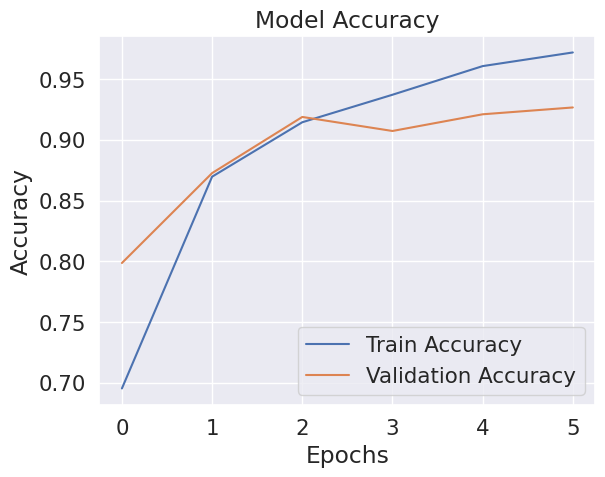

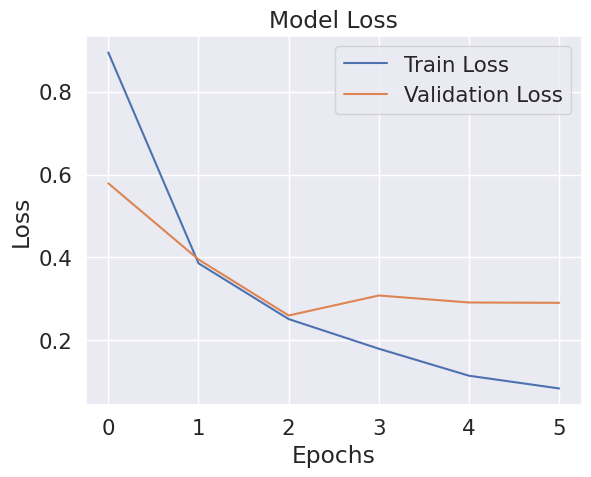

In [29]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


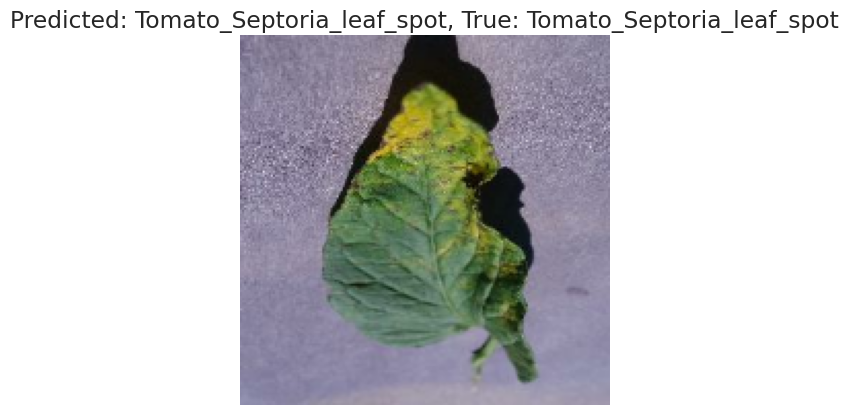

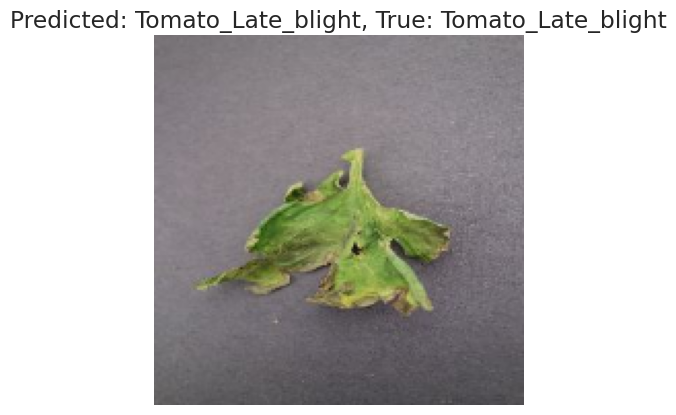

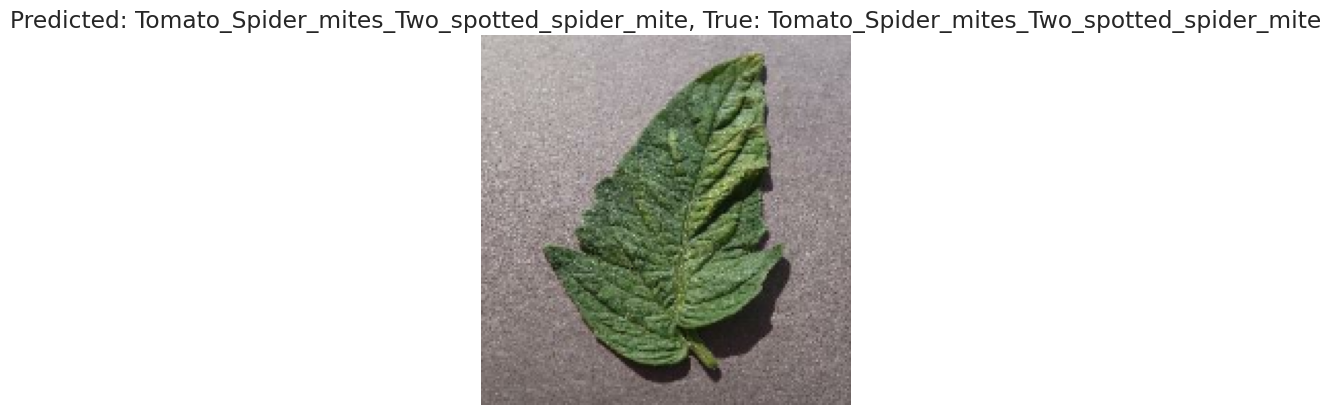

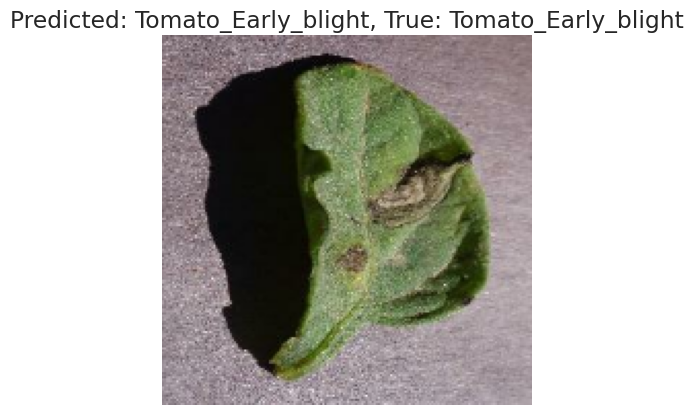

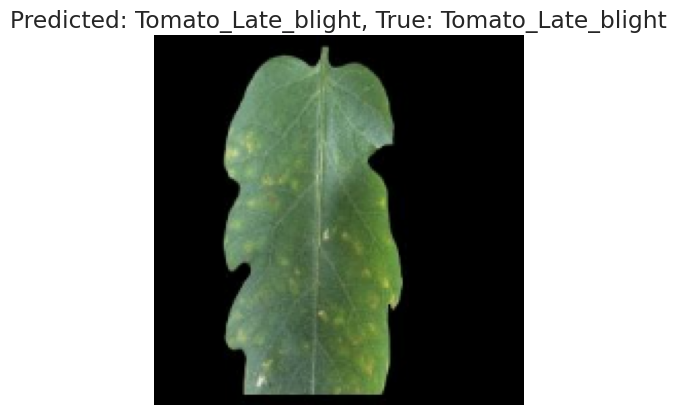

In [30]:
class_names = train_ds.class_names

for images, labels in val_ds.take(1):  # Take one batch for prediction demonstration
    predictions = model.predict(images)
    for i in range(5):  # Display predictions for first 5 images in the batch
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]}, True: {class_names[labels[i]]}")
        plt.axis("off")
        plt.show()

In [31]:
model.save('tomato.h5')
